<a href="https://colab.research.google.com/github/klinhle2306/Homelessness/blob/main/Data_Preparation_Homelessness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

  The 2020 [point-in-time count](https://www.kingcounty.gov/elected/executive/constantine/news/release/2020/July/01-homeless-count.aspx) of people experiencing homelessness for Seattle/King County was 11,751. This represents a 5% increase over the 2019 count and reflects similar trend across many counties in the western U.S.. 
  
  The U.S. Department of Housing and Urban Development (HUD) produced a report in 2019 [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) that describes a model-based approach to understanding of the relationship between local housing market factors and homelessness. 
  
  This project investigates whether there are alternative modeling approaches that outperform the models described in the HUD report.


## Import libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm


# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

## The data

  
  The [data](https://github.com/brian-fischer/DATA-3320/blob/main/homelessness/05b_analysis_file_update.csv) for this project are described in HUD's report [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) in the section titled DATA.

  The data dictionary [HUD TO3 - 05b Analysis File - Data Dictionary.csv](https://github.com/brian-fischer/DATA-3320/blob/main/homelessness/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20-%20Dictionary.csv) contains descriptions of all variables in the data set.


## Load the data

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/klinhle2306/Homelessness/main/05b_analysis_file_update.csv')

In [72]:
dictionary = pd.read_csv('https://raw.githubusercontent.com/klinhle2306/Homelessness/main/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20-%20Dictionary.csv')

## Explore the contents of the data set

Identify predictor variables and target variables

In [73]:
df.head()

,year,cocnumber,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,pit_ind_shelt_pit_hud,pit_ind_unshelt_pit_hud,pit_ind_hless_pit_hud,pit_perfam_shelt_pit_hud,pit_perfam_unshelt_pit_hud,...,sub_high_cost_rent75,sub_high_cost_homeval75,sub_high_rent_share75,tight_high_cost_rental_mkt,sub_tight_high_cost_rent,sub_west_coast_all_urb,sub_west_census,major_city,suburban,rural
0,2010,AK-500,1113.0,118.0,1231.0,633.0,107.0,740.0,480.0,11.0,...,1,1,1,3,1,1,1,1,0,0
1,2011,AK-500,1082.0,141.0,1223.0,677.0,117.0,794.0,405.0,24.0,...,1,1,0,3,1,1,1,1,0,0
2,2012,AK-500,1097.0,50.0,1147.0,756.0,35.0,791.0,341.0,15.0,...,1,1,1,3,1,1,1,1,0,0
3,2013,AK-500,1070.0,52.0,1122.0,792.0,52.0,844.0,278.0,0.0,...,1,1,0,3,1,1,1,1,0,0
4,2014,AK-500,970.0,53.0,1023.0,688.0,48.0,736.0,282.0,5.0,...,1,1,1,3,1,1,1,1,0,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Columns: 332 entries, year to rural
dtypes: float64(257), int64(73), object(2)
memory usage: 7.6+ MB


Observe that this is a large dataset with 332 different variable. This will make it difficult to understand and analyze the data effectively.


In [75]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 332 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    year                              int64  
 1    cocnumber                         object 
 2    pit_tot_shelt_pit_hud             float64
 3    pit_tot_unshelt_pit_hud           float64
 4    pit_tot_hless_pit_hud             float64
 5    pit_ind_shelt_pit_hud             float64
 6    pit_ind_unshelt_pit_hud           float64
 7    pit_ind_hless_pit_hud             float64
 8    pit_perfam_shelt_pit_hud          float64
 9    pit_perfam_unshelt_pit_hud        float64
 10   pit_perfam_hless_pit_hud          float64
 11   pit_ind_chronic_hless_pit_hud     float64
 12   pit_perfam_chronic_hless_pit_hud  float64
 13   pit_vet_hless_pit_hud             float64
 14   econ_urb_urbanicity               int64  
 15   coctag                            int64  
 16   panelvar              

In [76]:
dictionary

,Associated Domain,Variable,Variable Label,Derived,Source or Root Variable,Table Name(s)
0,Identifier,year,year,No,NaN,NaN
1,Identifier,cocnumber,continuum of care number,No,HUD,NaN
2,Outcome,pit_tot_shelt_pit_hud,total sheltered - HUD PIT,No,HUD PIT,NaN
3,Outcome,pit_tot_unshelt_pit_hud,total unsheltered - HUD PIT,No,HUD PIT,NaN
4,Outcome,pit_tot_hless_pit_hud,total homeless - HUD PIT,No,HUD PIT,NaN
...,...,...,...,...,...,...
327,Subgroup,sub_west_coast_all_urb,indicator for suburban or major city/largely u...,No,NaN,NaN
328,Subgroup,sub_west_census,indicator for west region CoCs,No,NaN,NaN
329,Subgroup,major_city,indicator for major city or largely urban CoC,No,HUD,NaN
330,Subgroup,suburban,indicator for largely suburban CoC,No,HUD,NaN


### Explore the data sources

Use the dictionary to find the unique `Associated Domain` values.

In [77]:
dictionary['Associated Domain'].unique()

array(['Identifier', 'Outcome', 'Secondary Outcome', 'Subgroup',
       'Safety Net', 'Demographic', 'Housing', 'Economic', 'Local Policy',
       'Climate', 'Geography'], dtype=object)


A bar graph that shows the counts of different associated domains.

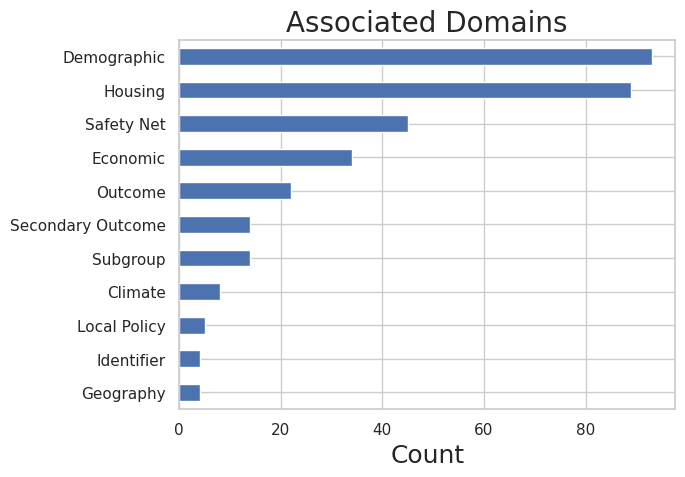

In [78]:
dictionary['Associated Domain'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()

plt.xlabel('Count', fontsize=18)
plt.title('Associated Domains', fontsize=20);

A bar graph that shows the counts of different data sources described in `Source or Root Variable`.

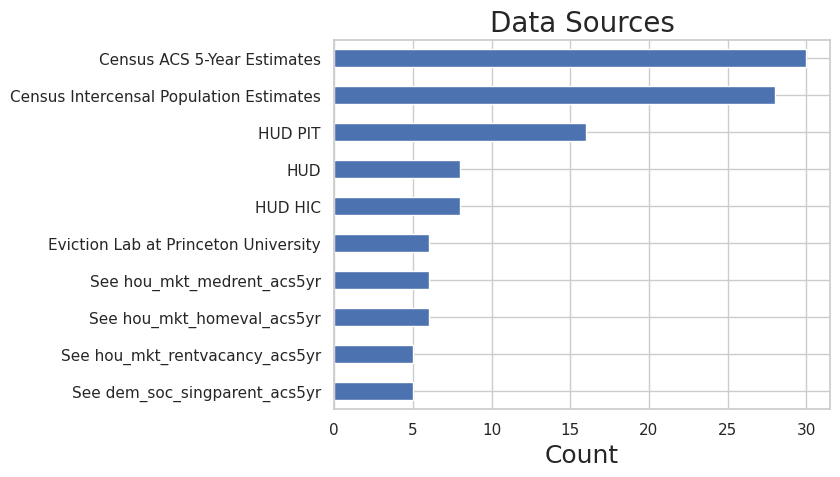

In [79]:
dictionary['Source or Root Variable'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()

plt.xlabel('Count', fontsize=18)
plt.title('Data Sources', fontsize=20);

## Select relevant subsets of the data

In [80]:
columns_to_keep = ["year", "cocnumber",
  
                  "pit_tot_hless_pit_hud", "pit_tot_shelt_pit_hud", "pit_tot_unshelt_pit_hud","dem_pop_pop_census",
  
                  "fhfa_hpi_2009", "ln_hou_mkt_medrent_xt", "hou_mkt_utility_xt", "hou_mkt_burden_own_acs5yr_2017", "hou_mkt_burden_sev_rent_acs_2017", "hou_mkt_rentshare_acs5yr_2017", "hou_mkt_rentvacancy_xt", "hou_mkt_density_dummy", "hou_mkt_evict_count", "hou_mkt_ovrcrowd_acs5yr_2017", "major_city", "suburban",
           
                  "econ_labor_unemp_rate_BLS", "econ_labor_incineq_acs5yr_2017", "econ_labor_pov_pop_census_share",
           
                  "hou_pol_hudunit_psh_hud_share", "hou_pol_occhudunit_psh_hud", "hou_mkt_homeage1940_xt",
           
                  "dem_soc_black_census", "dem_soc_hispanic_census", "dem_soc_asian_census", "dem_soc_pacific_census", "dem_pop_child_census", "dem_pop_senior_census", "dem_pop_female_census", "dem_pop_mig_census", "d_dem_pop_mig_census_share", "dem_soc_singadult_xt", "dem_soc_singparent_xt", "dem_soc_vet_xt", "dem_soc_ed_lessbach_xt", "dem_health_cost_dart", "dem_health_excesdrink_chr",
           
                  "env_wea_avgtemp_noaa", "env_wea_avgtemp_summer_noaa", "env_wea_precip_noaa", "env_wea_precip_annual_noaa", "hou_pol_fedfundcoc", "d_hou_pol_fedfundcoc"]
    

In [81]:
df = df[columns_to_keep]

In [82]:
df.head()

,year,cocnumber,pit_tot_hless_pit_hud,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,dem_pop_pop_census,fhfa_hpi_2009,ln_hou_mkt_medrent_xt,hou_mkt_utility_xt,hou_mkt_burden_own_acs5yr_2017,...,dem_soc_vet_xt,dem_soc_ed_lessbach_xt,dem_health_cost_dart,dem_health_excesdrink_chr,env_wea_avgtemp_noaa,env_wea_avgtemp_summer_noaa,env_wea_precip_noaa,env_wea_precip_annual_noaa,hou_pol_fedfundcoc,d_hou_pol_fedfundcoc
0,2010,AK-500,1231.0,1113.0,118.0,285194,0.000000,NaN,NaN,15.334315,...,NaN,NaN,7.78885,NaN,18.400000,56.599998,0.68,12.560000,25.98005,NaN
1,2011,AK-500,1223.0,1082.0,141.0,293370,0.009359,2.266958,9.3,15.334315,...,17.23423,66.952057,7.85001,NaN,18.799999,55.799999,0.52,15.560000,27.17670,NaN
2,2012,AK-500,1147.0,1097.0,50.0,296291,-0.049137,NaN,NaN,15.334315,...,NaN,NaN,7.90594,NaN,2.900000,55.900002,1.17,16.459999,30.01799,NaN
3,2013,AK-500,1122.0,1070.0,52.0,298520,-0.255042,2.266958,9.3,15.334315,...,17.23423,66.952057,7.83198,NaN,23.299999,56.000000,1.10,20.270000,29.96026,NaN
4,2014,AK-500,1023.0,970.0,53.0,301081,3.170481,NaN,NaN,15.334315,...,NaN,NaN,7.95718,NaN,30.299999,60.099998,1.52,24.010000,27.86784,NaN


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              3008 non-null   int64  
 1   cocnumber                         3008 non-null   object 
 2   pit_tot_hless_pit_hud             2994 non-null   float64
 3   pit_tot_shelt_pit_hud             2994 non-null   float64
 4   pit_tot_unshelt_pit_hud           2994 non-null   float64
 5   dem_pop_pop_census                3008 non-null   int64  
 6   fhfa_hpi_2009                     3008 non-null   float64
 7   ln_hou_mkt_medrent_xt             1504 non-null   float64
 8   hou_mkt_utility_xt                1504 non-null   float64
 9   hou_mkt_burden_own_acs5yr_2017    3008 non-null   float64
 10  hou_mkt_burden_sev_rent_acs_2017  3008 non-null   float64
 11  hou_mkt_rentshare_acs5yr_2017     3008 non-null   float64
 12  hou_mk

In [84]:
dictionary_small = dictionary[dictionary['Variable'].isin(columns_to_keep)]

In [85]:
dictionary_small

,Associated Domain,Variable,Variable Label,Derived,Source or Root Variable,Table Name(s)
0,Identifier,year,year,No,NaN,NaN
1,Identifier,cocnumber,continuum of care number,No,HUD,NaN
2,Outcome,pit_tot_shelt_pit_hud,total sheltered - HUD PIT,No,HUD PIT,NaN
3,Outcome,pit_tot_unshelt_pit_hud,total unsheltered - HUD PIT,No,HUD PIT,NaN
4,Outcome,pit_tot_hless_pit_hud,total homeless - HUD PIT,No,HUD PIT,NaN
22,Safety Net,hou_pol_fedfundcoc,CoC federal funding - HUD,No,HUD CoC Funding Reports,NaN
32,Demographic,dem_pop_pop_census,"total population, intercensal estimate",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."
34,Demographic,dem_pop_female_census,"total female population, intercensal estimate",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."
35,Demographic,dem_pop_child_census,"total population ages 0-19, intercensal estimate",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."
37,Demographic,dem_pop_senior_census,"total population ages 65 or older, intercensal...",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."


A bar graph that shows how many variables of each Associated Domain are in the smaller data set


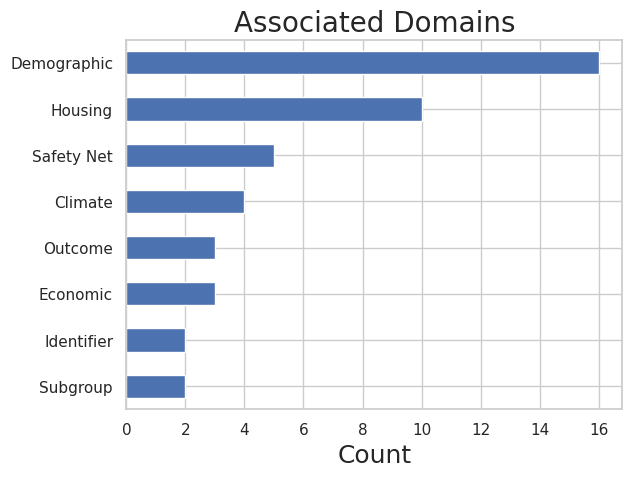

In [86]:
dictionary_small['Associated Domain'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()

plt.xlabel('Count', fontsize=18)
plt.title('Associated Domains', fontsize=20);

A bar graph that shows the data sources in the smaller data set


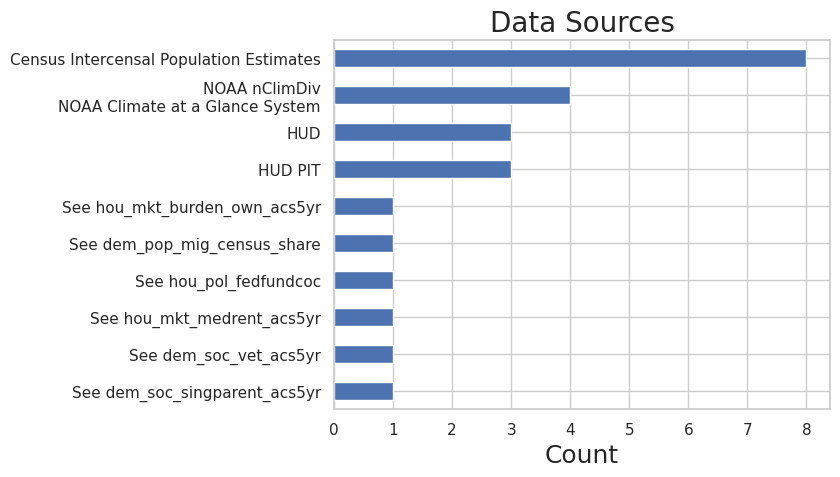

In [87]:
dictionary_small['Source or Root Variable'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()

plt.xlabel('Count', fontsize=18)
plt.title('Data Sources', fontsize=20);

## Rename columns

In [88]:
df = df.rename(columns = {"cocnumber":"coc_number",
  
                          "pit_tot_hless_pit_hud":"total_homeless", 
                          "pit_tot_shelt_pit_hud":"total_sheltered", 
                          "pit_tot_unshelt_pit_hud":"total_unsheltered",
                          "dem_pop_pop_census":"total_population",
  
                          "fhfa_hpi_2009":"house_price_index_2009", 
                          "ln_hou_mkt_medrent_xt":"log_median_rent", 
                          "hou_mkt_utility_xt":"utility_costs", 
                          "hou_mkt_burden_own_acs5yr_2017":"percentage_owners_cost_burden_2016", 
                          "hou_mkt_burden_sev_rent_acs_2017":"percentage_renters_severe_cost_burden_2016", 
                          "hou_mkt_rentshare_acs5yr_2017":"share_renters_2016", 
                          "hou_mkt_rentvacancy_xt":"rental_vacancy_rate", 
                          "hou_mkt_density_dummy":"high_housing_density", 
                          "hou_mkt_evict_count":"number_eviction", 
                          "hou_mkt_ovrcrowd_acs5yr_2017":"share_overcrowded_units_2016", 
                          "major_city":"city_or_urban", 
           
                          "econ_labor_unemp_rate_BLS":"rate_unemployment", 
                          "econ_labor_incineq_acs5yr_2017":"gini_coefficient_2016", 
                          "econ_labor_pov_pop_census_share":"poverty_rate",
           
                          "hou_pol_hudunit_psh_hud_share":"share_HUD_units", 
                          "hou_pol_occhudunit_psh_hud":"HUD_unit_occupancy_rate", 
                          "hou_mkt_homeage1940_xt":"share_built_before_1940",
           
                          "dem_soc_black_census":"total_black", 
                          "dem_soc_hispanic_census":"total_latino_hispanic", 
                          "dem_soc_asian_census":"total_asian", 
                          "dem_soc_pacific_census":"total_pacific_islander", 
                          "dem_pop_child_census":"total_population_0_19", 
                          "dem_pop_senior_census":"total_population_65_plus", 
                          "dem_pop_female_census":"total_female_population", 
                          "dem_pop_mig_census":"net_migration", 
                          "d_dem_pop_mig_census_share":"migration_4_year_change", 
                          "dem_soc_singadult_xt":"proportion_one_person_households", 
                          "dem_soc_singparent_xt":"share_under_18_with_single_parent", 
                          "dem_soc_vet_xt":"share_veteran_status", 
                          "dem_soc_ed_lessbach_xt":"share_no_bachelors", 
                          "dem_health_cost_dart":"medicare_reimbursements_per_enrollee", 
                          "dem_health_excesdrink_chr":"percentage_excessive_drinking",
           
                          "env_wea_avgtemp_noaa":"average_Jan_temperature", 
                          "env_wea_avgtemp_summer_noaa":"average_summer_temperature", 
                          "env_wea_precip_noaa":"total_Jan_precipitation", 
                          "env_wea_precip_annual_noaa":"total_annual_precipitation",
                          "hou_pol_fedfundcoc":"federal_funding",
                          "d_hou_pol_fedfundcoc":"federal_funding_change"})

## Quality Control

Check for out-of-range values or values that are not useful for analysis. Either set values to `NaN` or remove the observations, as appropriate.

In [89]:
df.agg(['min','max'])

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,share_veteran_status,share_no_bachelors,medicare_reimbursements_per_enrollee,percentage_excessive_drinking,average_Jan_temperature,average_summer_temperature,total_Jan_precipitation,total_annual_precipitation,federal_funding,federal_funding_change
min,2010,AK-500,7.0,3.0,0.0,29344,-26.497087,1.239243,5.6,8.072322,...,2.798413,23.686455,6.03065,0.105147,-3.240000,55.799999,0.000000,1.250000,0.00000,-56.846024
max,2017,WY-500,76501.0,72565.0,42828.0,11058958,63.864007,2.874838,22.6,22.955448,...,23.876883,88.644989,17.94801,0.294401,74.699997,93.250000,25.321701,105.190002,1219.65844,280.022278


In [90]:
df.agg(['min','max']).T

,min,max
year,2010,2017
coc_number,AK-500,WY-500
total_homeless,7.0,76501.0
total_sheltered,3.0,72565.0
total_unsheltered,0.0,42828.0
total_population,29344,11058958
house_price_index_2009,-26.497087,63.864007
log_median_rent,1.239243,2.874838
utility_costs,5.6,22.6
percentage_owners_cost_burden_2016,8.072322,22.955448


## Identify and deal with missing values

Determine whether there are missing values in the data set.

<Axes: >

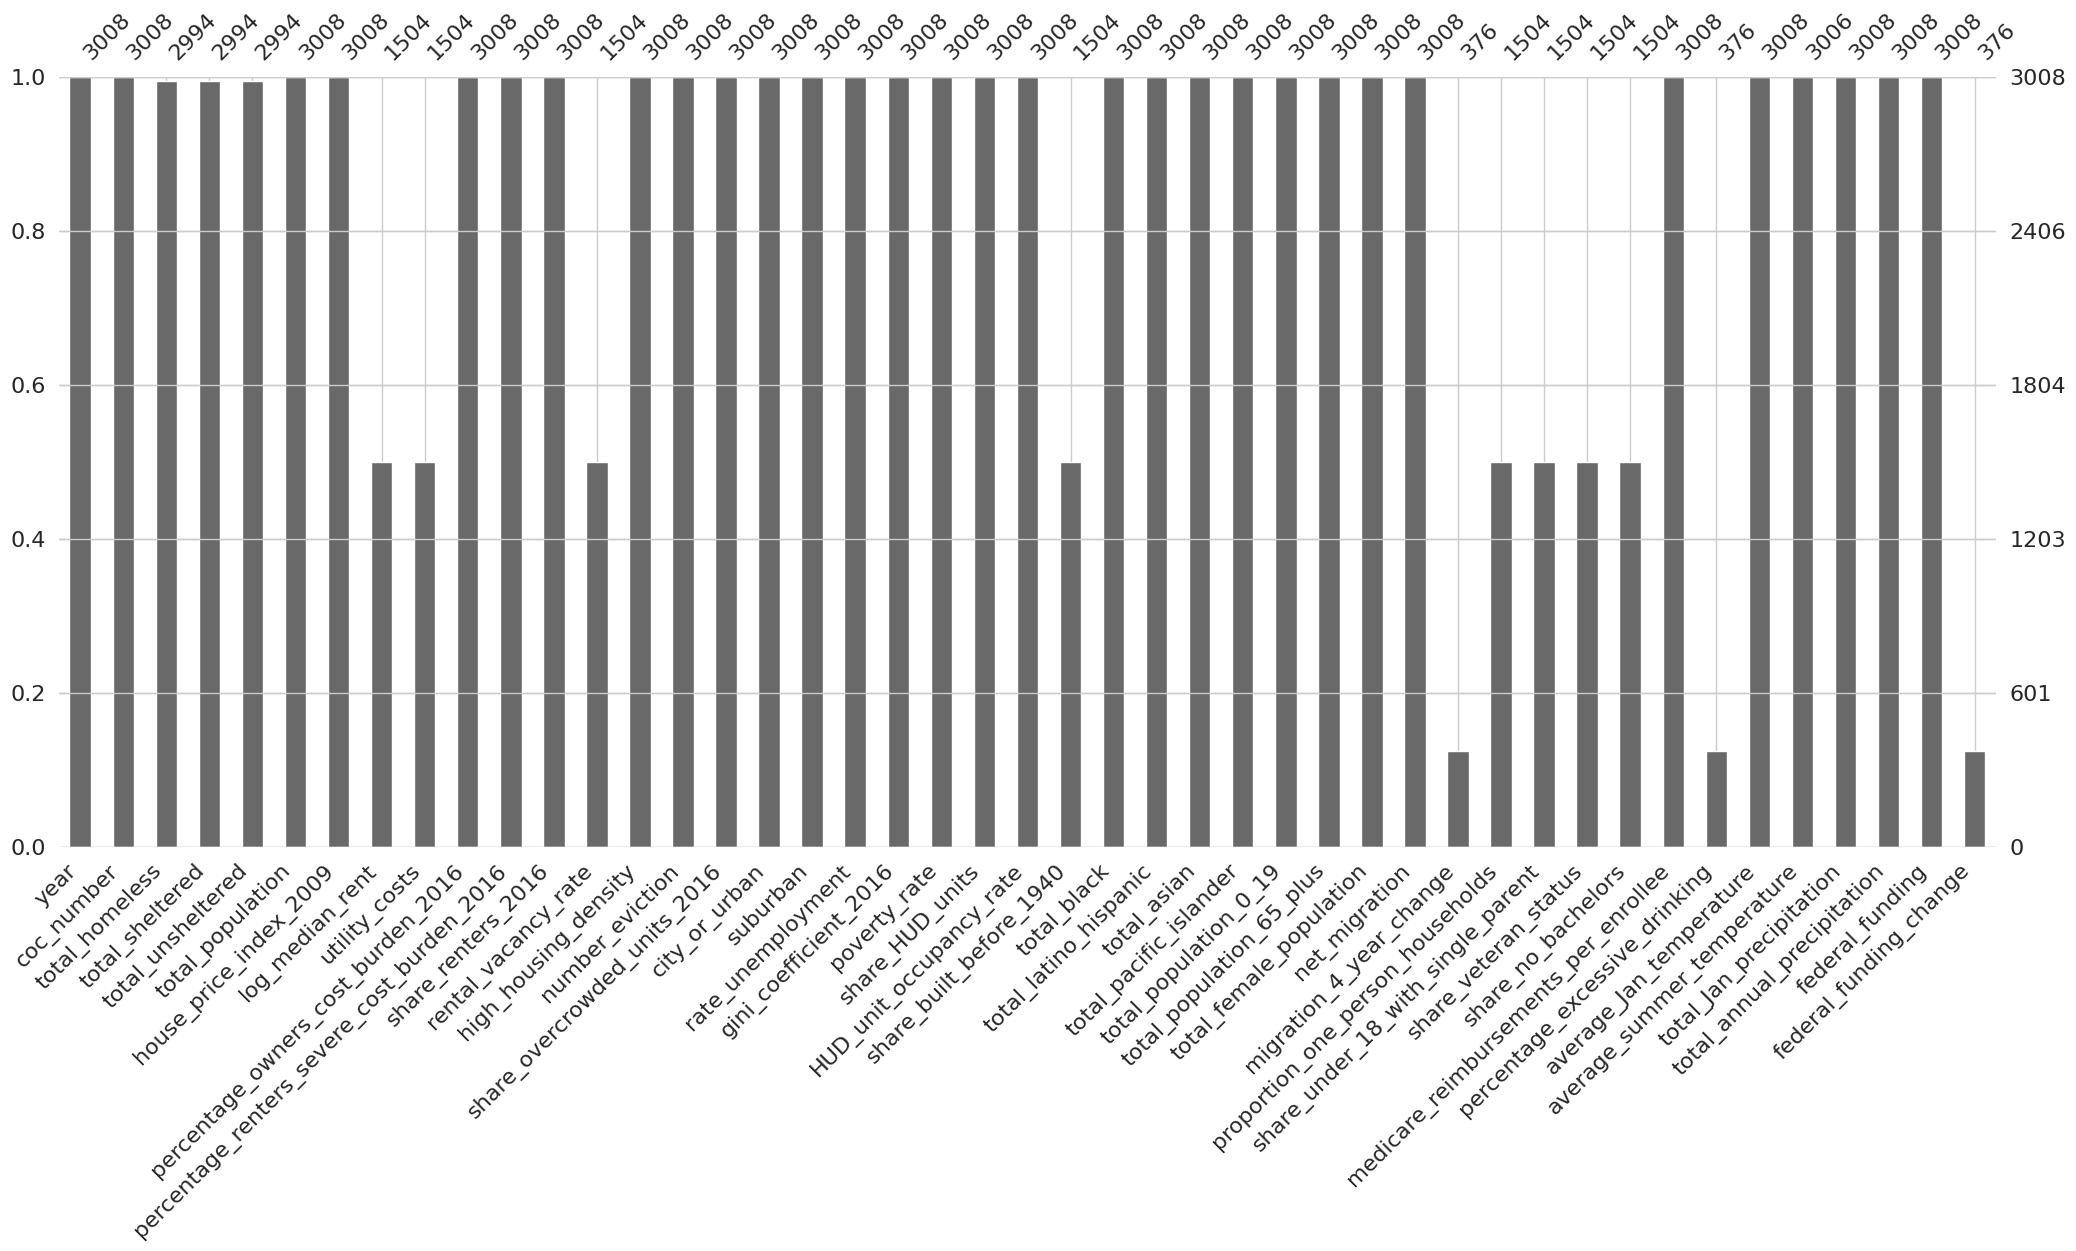

In [91]:
msno.bar(df)

<Axes: >

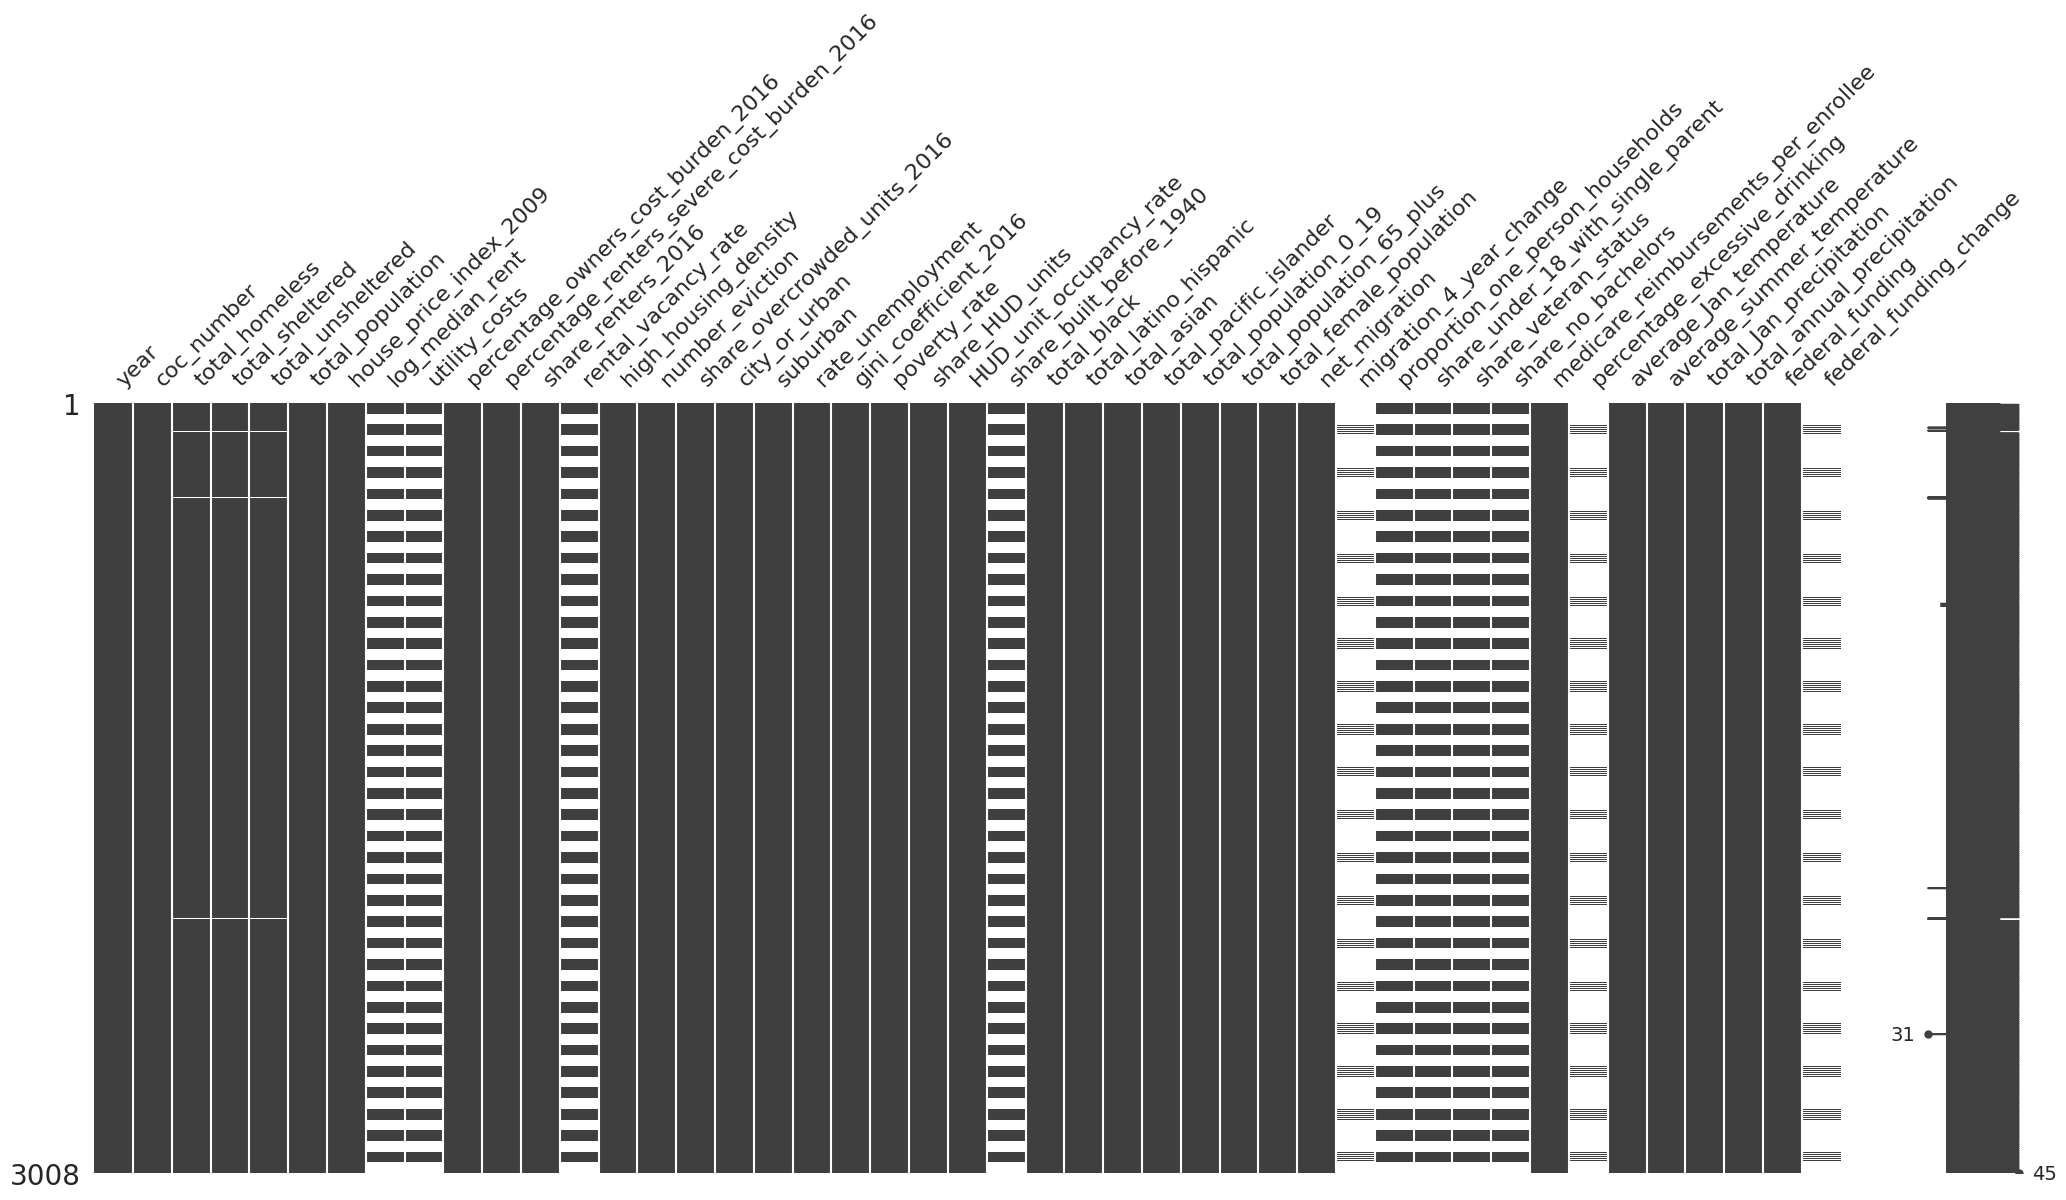

In [92]:
msno.matrix(df)

Since this project is aiming to predict the number of people experiencing homelessness, I'm removing the rows that those numbers are missing

In [93]:
df = df[df['total_homeless'].isna() == False]

In [94]:
df.isna().sum()

year                                             0
coc_number                                       0
total_homeless                                   0
total_sheltered                                  0
total_unsheltered                                0
total_population                                 0
house_price_index_2009                           0
log_median_rent                               1495
utility_costs                                 1495
percentage_owners_cost_burden_2016               0
percentage_renters_severe_cost_burden_2016       0
share_renters_2016                               0
rental_vacancy_rate                           1495
high_housing_density                             0
number_eviction                                  0
share_overcrowded_units_2016                     0
city_or_urban                                    0
suburban                                         0
rate_unemployment                                0
gini_coefficient_2016          

There are some variables that are missing many of their values. 


A scatter plots of the variables that are missing many values vs. time to see if data are missing from particular years.

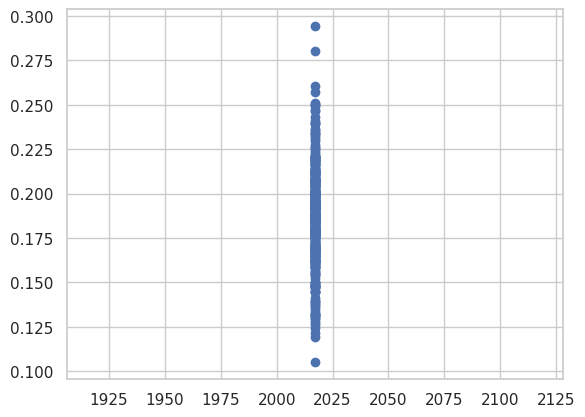

In [95]:
plt.plot(df['year'], df['percentage_excessive_drinking'], 'o');

In [96]:
df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

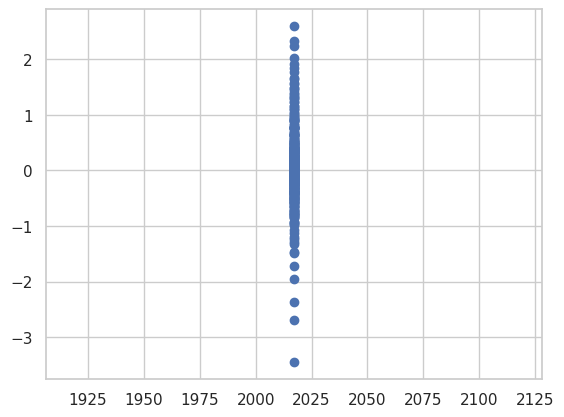

In [97]:
plt.plot(df['year'], df['migration_4_year_change'], 'o');

Since `percentage_excessive_drinking` and `migration_4_year_change` only have data from 2017, I will focus on data from 2017.

In [98]:
df = df[df['year'] == 2017]

In [99]:
df.shape

(374, 45)

Check for missing values.

In [100]:
df.isna().sum()

year                                          0
coc_number                                    0
total_homeless                                0
total_sheltered                               0
total_unsheltered                             0
total_population                              0
house_price_index_2009                        0
log_median_rent                               0
utility_costs                                 0
percentage_owners_cost_burden_2016            0
percentage_renters_severe_cost_burden_2016    0
share_renters_2016                            0
rental_vacancy_rate                           0
high_housing_density                          0
number_eviction                               0
share_overcrowded_units_2016                  0
city_or_urban                                 0
suburban                                      0
rate_unemployment                             0
gini_coefficient_2016                         0
poverty_rate                            

## Create relevant derived variables as new columns

Create new variables `rate_homeless`, `rate_sheltered`, and `rate_unsheltered` in the data frame `df_2017` that are the counts per 10,000 people in the population.


In [101]:
df['rate_homeless'] = df['total_homeless']/(df['total_population']/10_000)
df['rate_sheltered'] = df['total_sheltered']/(df['total_population']/10_000)
df['rate_unsheltered'] = df['total_unsheltered']/(df['total_population']/10_000)

<ipython-input-101-87b6e30b3656>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate_homeless'] = df['total_homeless']/(df['total_population']/10_000)
<ipython-input-101-87b6e30b3656>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate_sheltered'] = df['total_sheltered']/(df['total_population']/10_000)
<ipython-input-101-87b6e30b3656>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

We should note that the demographic variables (race, gender, age) are given as total counts. We will also convert these totals to percentages.

In [102]:
df['percent_black'] = df['total_black'] / df['total_population']
df['percent_latino_hispanic'] = df['total_latino_hispanic'] / df['total_population']
df['percent_asian'] = df['total_asian'] / df['total_population']
df['percent_pacific_islander'] = df['total_pacific_islander'] / df['total_population']
df['percent_population_0_19'] = df['total_population_0_19'] / df['total_population']
df['percent_population_65_plus'] = df['total_population_65_plus'] / df['total_population']
df['percent_female_population'] = df['total_female_population'] / df['total_population']

<ipython-input-102-bafbd3333d2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percent_black'] = df['total_black'] / df['total_population']
<ipython-input-102-bafbd3333d2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percent_latino_hispanic'] = df['total_latino_hispanic'] / df['total_population']
<ipython-input-102-bafbd3333d2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

## Export the clean .csv files

Export files with the training and testing data

In [103]:
from google.colab import files

df.to_csv('clean_homelessness.csv', encoding = 'utf-8-sig', index=False) 
files.download('clean_homelessness.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>